## Resources
+ http://snap.stanford.edu/node2vec/
+ https://github.com/aditya-grover/node2vec

In [9]:
NODE2VEC = "./node2vec/src/main.py"
INPUT = "./node2vec/graph/karate.edgelist"
OUTPUT = "./node2vec/emb/karate.emb"

import os
import subprocess

def node2vec(edgelist, emb):
    cmd = [
        'python', NODE2VEC,
        '--input', edgelist,
        '--output', emb,
    ]
    print(" ".join(cmd))
    process = subprocess.Popen(cmd, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    stdout = process.communicate()[0]
    print 'STDOUT:{}'.format(stdout)
    return
node2vec(INPUT, OUTPUT)

python ./node2vec/src/main.py --input ./node2vec/graph/karate.edgelist --output ./node2vec/emb/karate.emb
STDOUT:Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10



In [3]:
import json
import networkx as nx

DATASET = "/Users/tnguyen/dataspace/graph/ppi/"
INPUT_JSON = DATASET + "ppi-G.json"
# parsed = json.load(open(json_file, 'r'))
# json.dump(parsed, open(json_file, 'w'), indent=4, sort_keys=True)

from networkx.readwrite import json_graph

with open(INPUT_JSON, 'r') as f:
    js_graph = json.load(f)
graph = json_graph.node_link_graph(js_graph)
nx.info(graph)

'Name: \nType: Graph\nNumber of nodes: 56944\nNumber of edges: 818716\nAverage degree:  28.7551'

Name: 
Type: SubGraph
Number of nodes: 1000
Number of edges: 7374
Average degree:  14.7480


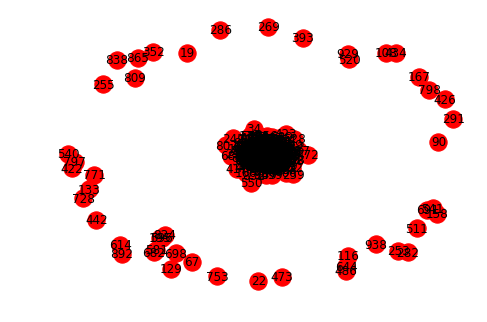

In [7]:
import matplotlib.pyplot as plt

subgraph = graph.subgraph(range(1000))
print(nx.info(subgraph))

# write edgelist to grid.edgelist
EDGELIST = DATASET + "edgelist/ppi-subgraph.edgelist"
nx.write_edgelist(subgraph, path=EDGELIST, delimiter=" ", data=False)

# read edgelist from grid.edgelist
# H = nx.read_edgelist(path=EDGELIST, delimiter=" ")
# nx.draw(H)

%matplotlib inline
nx.draw(subgraph, with_labels=True)
plt.show()
# plt.savefig(DATASET + "edgelist/graph.png", dpi=300)

In [10]:
node2vec(EDGELIST, DATASET + "emb/ppi-subgraph.emb")

python ./node2vec/src/main.py --input /Users/tnguyen/dataspace/graphsage/ppi/edgelist/ppi-subgraph.edgelist --output /Users/tnguyen/dataspace/graphsage/ppi/emb/ppi-subgraph.emb
STDOUT:Walk iteration:
1 / 10
2 / 10
3 / 10
4 / 10
5 / 10
6 / 10
7 / 10
8 / 10
9 / 10
10 / 10

